In [113]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

### Reading in from external source

In [114]:
data = pd.read_csv("../Dataset/Leidinger2016/data.csv", index_col=0)
metadata = pd.read_csv("../Dataset/Leidinger2016/metadata.csv", index_col=0)

In [115]:
data

,427_73,427_203,427_6,427_113,427_204,427_72,427_114,CBC-Std._PAX,427_74,427_144,...,427_32,427_130,427_195,427_43,427_132,427_21,427_51,427_194,427_22,427_131
mirna,,,,,,,,,,,,,,,,,,,,,
hsa-let-7d-3p,15.932603,15.223523,16.248352,22.413015,13.645375,14.738012,22.596233,22.888973,15.866733,24.288934,...,15.509471,20.697998,15.889463,15.685995,19.293326,25.930607,14.996039,15.952217,24.905330,19.285037
hsa-miR-1274A,10.737571,10.574143,11.331379,11.572388,10.042076,10.144483,12.356872,10.705495,9.667815,13.633111,...,10.679353,13.142619,10.238733,11.271985,15.254062,12.772054,10.690352,11.481045,12.959969,13.640983
hsa-miR-130b-5p,20.781680,22.014845,21.718082,23.709886,19.100417,21.827675,25.048847,36.433345,21.689067,27.451811,...,20.099207,25.060506,21.664748,20.498594,26.540182,26.644933,19.678436,21.797062,25.517612,26.471666
hsa-miR-18b-3p,22.427460,25.036337,25.034230,30.959039,20.030237,21.940433,23.854875,NaN,22.811107,NaN,...,22.284950,23.662515,26.152364,21.575217,23.234337,24.539601,20.642805,26.419264,NaN,24.594952
hsa-mir-374a-3p,NaN,35.488431,28.069303,NaN,NaN,26.889067,NaN,NaN,NaN,NaN,...,25.392850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-525-5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-miR-499a-5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.002006,NaN,NaN,NaN,27.854501,NaN,NaN,NaN
hsa-miR-425-5p,11.527253,11.564897,11.373714,12.954788,10.769821,11.765464,15.327691,23.278471,12.285083,20.455999,...,10.468457,16.415906,11.180775,11.154117,18.681152,16.498625,9.863937,11.245421,16.345123,19.150788


In [116]:
metadata

,Class,extraction
CBCID,,
427_2,0 (Ctrl),miRNeasy
427_3,0 (Ctrl),miRNeasy
427_7,0 (Ctrl),miRNeasy
427_1,0 (Ctrl),miRNeasy
427_10,0 (Ctrl),miRNeasy
...,...,...
427_194,3 (COPD),miRNeasy
427_195,3 (COPD),miRNeasy
427_196,3 (COPD),miRNeasy


In [117]:
data2 = pd.concat([data.iloc[:].transpose(), metadata], axis=1)

In [118]:
data2 = data2.dropna(subset=["Class"])

In [119]:
data2

,hsa-let-7d-3p,hsa-miR-1274A,hsa-miR-130b-5p,hsa-miR-18b-3p,hsa-mir-374a-3p,hsa-miR-518e-5p,hsa-miR-595,hsa-miR-634,hsa-miR-675-5p,hsa-miR-942-5p,...,hsa-miR-98-5p,hsa-miR-744-5p,hsa-miR-598-3p,hsa-miR-525-5p,hsa-miR-499a-5p,hsa-miR-425-5p,hsa-miR-320d,hsa-miR-1471,Class,extraction
427_73,15.932603,10.737571,20.781680,22.427460,NaN,NaN,NaN,NaN,NaN,8.608420,...,21.479600,14.765223,18.852307,NaN,NaN,11.527253,13.790253,NaN,2 (LCa),miRNeasy
427_203,15.223523,10.574143,22.014845,25.036337,35.488431,NaN,NaN,NaN,NaN,9.110362,...,20.942969,15.233210,17.840421,NaN,NaN,11.564897,13.822623,NaN,3 (COPD),miRNeasy
427_6,16.248352,11.331379,21.718082,25.034230,28.069303,NaN,NaN,NaN,NaN,9.710889,...,19.022369,15.480556,17.553957,NaN,NaN,11.373714,11.482754,NaN,0 (Ctrl),miRNeasy
427_113,22.413015,11.572388,23.709886,30.959039,NaN,NaN,NaN,NaN,NaN,10.937889,...,NaN,16.846389,22.740004,NaN,NaN,12.954788,14.114211,NaN,2 (LCa),PAXGene Blood
427_204,13.645375,10.042076,19.100417,20.030237,NaN,NaN,NaN,NaN,NaN,8.237714,...,20.796972,14.728296,17.985389,NaN,NaN,10.769821,15.230916,NaN,3 (COPD),miRNeasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427_21,25.930607,12.772054,26.644933,24.539601,NaN,NaN,NaN,NaN,NaN,12.575656,...,23.968691,18.143339,22.656183,NaN,NaN,16.498625,23.065737,NaN,0 (Ctrl),PAXGene Blood
427_51,14.996039,10.690352,19.678436,20.642805,NaN,NaN,NaN,NaN,NaN,8.241445,...,20.385480,13.935923,17.096224,NaN,27.854501,9.863937,15.176894,NaN,2 (LCa),miRNeasy
427_194,15.952217,11.481045,21.797062,26.419264,NaN,NaN,NaN,NaN,NaN,8.690464,...,20.412882,14.900462,17.517965,NaN,NaN,11.245421,15.470059,NaN,3 (COPD),miRNeasy
427_22,24.905330,12.959969,25.517612,NaN,NaN,NaN,NaN,NaN,NaN,12.872868,...,22.758393,18.155782,20.193854,NaN,NaN,16.345123,19.442010,NaN,0 (Ctrl),PAXGene Blood


In [120]:
table = data2.iloc[:, :-2]
mirnas = table.columns

In [121]:
table

,hsa-let-7d-3p,hsa-miR-1274A,hsa-miR-130b-5p,hsa-miR-18b-3p,hsa-mir-374a-3p,hsa-miR-518e-5p,hsa-miR-595,hsa-miR-634,hsa-miR-675-5p,hsa-miR-942-5p,...,hsa-miR-320c,hsa-miR-1299,hsa-miR-98-5p,hsa-miR-744-5p,hsa-miR-598-3p,hsa-miR-525-5p,hsa-miR-499a-5p,hsa-miR-425-5p,hsa-miR-320d,hsa-miR-1471
427_73,15.932603,10.737571,20.781680,22.427460,NaN,NaN,NaN,NaN,NaN,8.608420,...,12.054734,18.381541,21.479600,14.765223,18.852307,NaN,NaN,11.527253,13.790253,NaN
427_203,15.223523,10.574143,22.014845,25.036337,35.488431,NaN,NaN,NaN,NaN,9.110362,...,10.501013,26.472544,20.942969,15.233210,17.840421,NaN,NaN,11.564897,13.822623,NaN
427_6,16.248352,11.331379,21.718082,25.034230,28.069303,NaN,NaN,NaN,NaN,9.710889,...,11.183694,19.951407,19.022369,15.480556,17.553957,NaN,NaN,11.373714,11.482754,NaN
427_113,22.413015,11.572388,23.709886,30.959039,NaN,NaN,NaN,NaN,NaN,10.937889,...,11.187046,18.126288,NaN,16.846389,22.740004,NaN,NaN,12.954788,14.114211,NaN
427_204,13.645375,10.042076,19.100417,20.030237,NaN,NaN,NaN,NaN,NaN,8.237714,...,11.567222,31.446154,20.796972,14.728296,17.985389,NaN,NaN,10.769821,15.230916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427_21,25.930607,12.772054,26.644933,24.539601,NaN,NaN,NaN,NaN,NaN,12.575656,...,13.037589,23.646209,23.968691,18.143339,22.656183,NaN,NaN,16.498625,23.065737,NaN
427_51,14.996039,10.690352,19.678436,20.642805,NaN,NaN,NaN,NaN,NaN,8.241445,...,11.235713,17.736150,20.385480,13.935923,17.096224,NaN,27.854501,9.863937,15.176894,NaN
427_194,15.952217,11.481045,21.797062,26.419264,NaN,NaN,NaN,NaN,NaN,8.690464,...,13.371917,22.308426,20.412882,14.900462,17.517965,NaN,NaN,11.245421,15.470059,NaN
427_22,24.905330,12.959969,25.517612,NaN,NaN,NaN,NaN,NaN,NaN,12.872868,...,11.775947,23.305037,22.758393,18.155782,20.193854,NaN,NaN,16.345123,19.442010,NaN


In [122]:
mirnas

Index(['hsa-let-7d-3p', 'hsa-miR-1274A', 'hsa-miR-130b-5p', 'hsa-miR-18b-3p',
       'hsa-mir-374a-3p', 'hsa-miR-518e-5p', 'hsa-miR-595', 'hsa-miR-634',
       'hsa-miR-675-5p', 'hsa-miR-942-5p',
       ...
       'hsa-miR-320c', 'hsa-miR-1299', 'hsa-miR-98-5p', 'hsa-miR-744-5p',
       'hsa-miR-598-3p', 'hsa-miR-525-5p', 'hsa-miR-499a-5p', 'hsa-miR-425-5p',
       'hsa-miR-320d', 'hsa-miR-1471'],
      dtype='object', length=241)

### Seperate case and controls

In [123]:
sick = data2["Class"] == "2 (LCa)"
controls = 1 - sick

In [124]:
sum(controls)

46

### Drop NAN

In [125]:
table = table.loc[:, table.isna().sum() < 10]

In [126]:
table = table.fillna(table.mean())

### T-test

In [127]:
X = table

In [128]:
X.columns

Index(['hsa-let-7d-3p', 'hsa-miR-1274A', 'hsa-miR-130b-5p', 'hsa-miR-942-5p',
       'hsa-miR-1274B', 'hsa-miR-378a-5p', 'hsa-miR-1180-3p', 'hsa-miR-1275',
       'hsa-miR-151a-3p', 'hsa-miR-26a-1-3p',
       ...
       'hsa-miR-494-3p', 'hsa-miR-422a', 'hsa-miR-30e-5p', 'hsa-miR-660-5p',
       'hsa-mir-495-3p', 'hsa-miR-423-5p', 'hsa-miR-378a-3p', 'hsa-miR-320c',
       'hsa-miR-744-5p', 'hsa-miR-425-5p'],
      dtype='object', length=135)

In [129]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [130]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [131]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [132]:
mirnas[lowest], pvalues

(Index(['hsa-miR-1228-5p', 'hsa-miR-922', 'hsa-miR-193a-3p', 'hsa-miR-1278',
        'hsa-miR-214-3p'],
       dtype='object'),
 array([8.06253652e-10, 3.49385160e-08, 8.21967223e-08, 3.28957684e-07,
        8.56960103e-07]))

### F-test

In [133]:
t3 = table

In [134]:
f, p = f_classif(t3, sick)

In [135]:
np.mean(p)

0.14985969979910188

### ANOVA

In [136]:
t3

,hsa-let-7d-3p,hsa-miR-1274A,hsa-miR-130b-5p,hsa-miR-942-5p,hsa-miR-1274B,hsa-miR-378a-5p,hsa-miR-1180-3p,hsa-miR-1275,hsa-miR-151a-3p,hsa-miR-26a-1-3p,...,hsa-miR-494-3p,hsa-miR-422a,hsa-miR-30e-5p,hsa-miR-660-5p,hsa-mir-495-3p,hsa-miR-423-5p,hsa-miR-378a-3p,hsa-miR-320c,hsa-miR-744-5p,hsa-miR-425-5p
427_73,15.932603,10.737571,20.781680,8.608420,8.132089,18.184960,14.773154,13.045610,5.440129,22.792691,...,16.742716,16.627646,12.846240,12.720609,16.746814,12.002794,14.249650,12.054734,14.765223,11.527253
427_203,15.223523,10.574143,22.014845,9.110362,7.211037,18.110918,14.634338,14.220239,4.942048,23.914895,...,17.220413,16.071475,11.559025,12.562058,17.896126,11.447781,13.418290,10.501013,15.233210,11.564897
427_6,16.248352,11.331379,21.718082,9.710889,8.669394,19.601994,14.870428,13.121768,5.214153,23.091475,...,15.105992,16.767592,12.560135,12.912236,14.340880,12.170640,14.380749,11.183694,15.480556,11.373714
427_113,22.413015,11.572388,23.709886,10.937889,8.745226,18.959819,16.752165,16.065183,5.237011,25.458145,...,19.965553,16.992381,19.312039,17.542576,18.520889,15.074075,15.281919,11.187046,16.846389,12.954788
427_204,13.645375,10.042076,19.100417,8.237714,7.169197,17.656942,14.658053,13.576933,4.992511,20.116229,...,16.137613,16.572672,11.806804,12.572991,15.746970,11.977297,13.453463,11.567222,14.728296,10.769821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427_21,25.930607,12.772054,26.644933,12.575656,9.766242,22.451370,17.432188,15.752313,5.574904,24.740712,...,22.241616,18.757249,20.860489,18.193890,23.749240,16.612016,16.859430,13.037589,18.143339,16.498625
427_51,14.996039,10.690352,19.678436,8.241445,8.090432,17.447508,13.917226,12.981381,5.814244,21.613239,...,16.804637,16.276795,10.717851,12.409627,16.907393,10.709560,13.305502,11.235713,13.935923,9.863937
427_194,15.952217,11.481045,21.797062,8.690464,8.302116,18.863634,15.071373,12.800323,5.662640,22.274696,...,16.453972,16.627645,11.269869,12.708274,16.640805,12.416056,13.214828,13.371917,14.900462,11.245421
427_22,24.905330,12.959969,25.517612,12.872868,9.841378,22.215412,18.902005,17.664583,5.585291,30.359050,...,21.011911,18.806379,20.308906,17.941247,22.412917,16.261281,17.363802,11.775947,18.155782,16.345123


In [137]:
X = np.array(sick).reshape(-1, 1)

In [138]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [139]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.057728396473144615

### Mean-variance-plot

In [140]:
np.mean(table)

hsa-let-7d-3p      18.556299
hsa-miR-1274A      11.569191
hsa-miR-130b-5p    23.045338
hsa-miR-942-5p     10.361790
hsa-miR-1274B       8.496979
                     ...    
hsa-miR-423-5p     13.546111
hsa-miR-378a-3p    16.182496
hsa-miR-320c       12.195143
hsa-miR-744-5p     16.202808
hsa-miR-425-5p     13.583900
Length: 135, dtype: float64

In [141]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [142]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

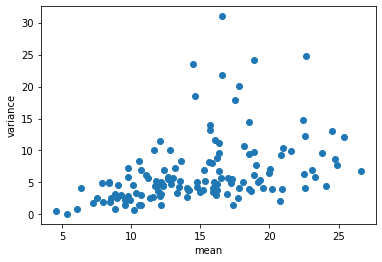

In [143]:
mean_variance_plot(table)

### Log transformation

In [144]:
log_table = table #np.log2(table)

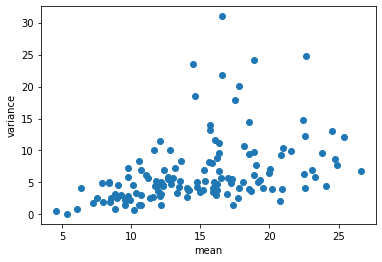

In [145]:
mean_variance_plot(log_table)

### Remove mean

In [146]:
log_table = table
norm_log_table = log_table - np.mean(log_table)
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

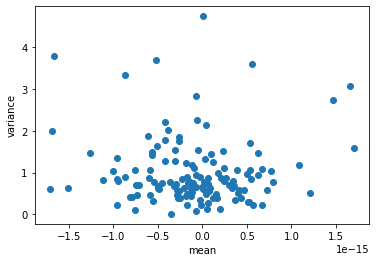

In [147]:
mean_variance_plot(norm_log_table)

### PCA

In [148]:
pca = decomposition.PCA(n_components=10)

In [149]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [150]:
pca.explained_variance_ratio_

array([0.76152984, 0.04991433, 0.02153446, 0.0188114 , 0.01448195,
       0.01217859, 0.01174087, 0.01052253, 0.00976771, 0.00857114])

In [151]:
components = pca.transform(norm_log_table)

In [152]:
components.shape

(120, 10)

In [153]:
sum(controls)

46

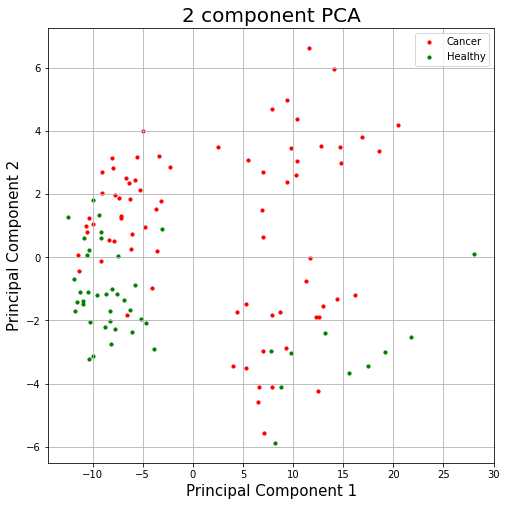

In [154]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [155]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

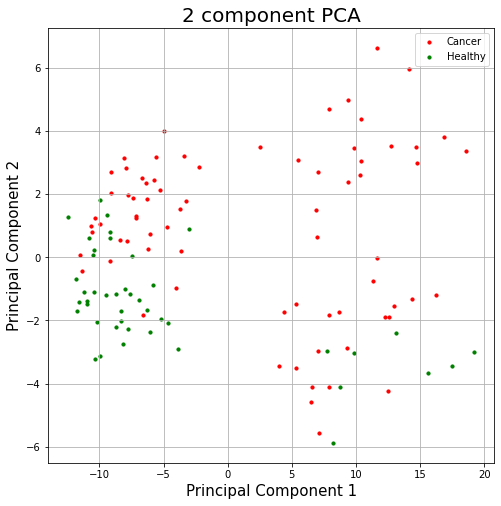

In [156]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [157]:
X_train, X_test, y_train, y_test = train_test_split(norm_log_table, controls, test_size=0.33, random_state=42)

In [158]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

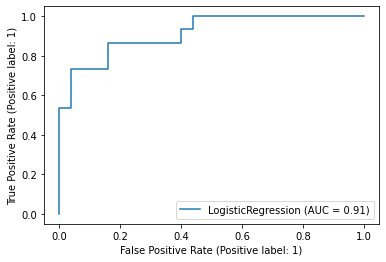

In [159]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [160]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[15:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

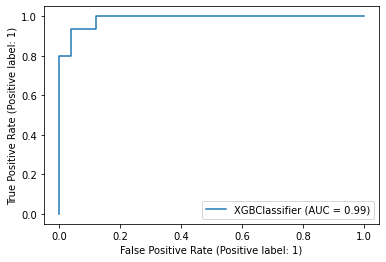

In [161]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [162]:
mirnas = table.columns

In [163]:
mirnas = [m.replace("A", "a").replace("B", "b").replace("P", "p") for m in mirnas]

In [164]:
from Scripts import converters

In [165]:
sequences = converters.canonical_to_seq(mirnas, True)

In [166]:
sequences = np.array(sequences)
mask = sequences != None
norm_log_table = norm_log_table.loc[:, mask]
sequences = sequences[mask]

In [167]:
norm_log_table.columns = sequences
norm_log_table = norm_log_table.loc[:,~norm_log_table.columns.duplicated()]
norm_log_table["cancer"] = sick
norm_log_table.head()

,CUAUACGACCUGCUGCCUUUCU,ACUCUUUCCCUGUUGCACUAC,UCUUCUCUGUUUUGGCCAUGUG,CUCCUGACUCCAGGUCCUGUGU,UUUCCGGCUCGCGUGGGUGUGU,GUGGGGGAGAGGCUGUC,CUAGACUGAAGCUCCUUGAGG,CCUAUUCUUGGUUACUUGCACG,AGUGCCUGAGGGAGUAAGAGCCC,CAACAAAUCACAGUCUGCCAUA,...,UGAAACAUACACGGGAAACCUC,ACUGGACUUAGGGUCAGAAGGC,UGUAAACAUCCUUGACUGGAAG,UACCCAUUGCAUAUCGGAGUUG,UGAGGGGCAGAGAGCGAGACUUU,ACUGGACUUGGAGUCAGAAGGC,AAAAGCUGGGUUGAGAGGGU,UGCGGGGCUAGGGCUAACAGCA,AAUGACACGAUCACUCCCGUUGA,cancer
427_73,-1.025376,-0.884669,-0.685241,-0.523130,-0.524163,-0.762008,0.021162,-0.761314,-0.833081,-1.352595,...,-0.532815,-0.282804,-1.459368,-1.151568,-0.603150,-0.755383,-0.054873,-0.561828,-0.803766,True
427_203,-1.302495,-0.402731,-0.489076,-0.552066,-0.578414,-0.302947,-0.173495,-0.322741,-0.479405,-1.095427,...,-0.346125,-0.500163,-1.962429,-1.213533,-0.820057,-1.080290,-0.662089,-0.378932,-0.789054,False
427_6,-0.901978,-0.518710,-0.254381,0.030667,-0.486147,-0.732245,-0.067153,-0.644545,-0.336916,-1.092573,...,-1.172469,-0.228111,-1.571182,-1.076678,-0.537553,-0.704148,-0.395288,-0.282266,-0.863771,False
427_113,1.507258,0.259714,0.225148,-0.220304,0.249262,0.418083,-0.058220,0.280383,0.150650,0.257333,...,0.726714,-0.140260,1.067556,0.732923,0.597149,-0.351958,-0.393978,0.251520,-0.245866,True
427_204,-1.919257,-1.541730,-0.830118,-0.729486,-0.569146,-0.554360,-0.153774,-1.807312,-0.984535,-1.421328,...,-0.769298,-0.304288,-1.865594,-1.209260,-0.613115,-1.066544,-0.245400,-0.576259,-1.099781,False


In [168]:
norm_log_table.to_csv("../TransformedData/Leidinger2016.csv", index=False)